# Izpit iz vaj (12. 12. 2023)

### Tematika podatkov: Zadovoljstvo potnikov z letom

Med potniki, ki potujejo z letalom, je bila izvedena raziskava z namenom ugotoviti, kateri dejavniki močno vplivajo na njihovo zadovoljstvo oziroma nezadovoljstvo z letom. Pridobljeni podatki so razdeljeni v tri datoteke:

- datoteko s podatki o potniku in letu (`passengers.csv`),
- datoteko s podatki o zadovoljstvu glede na različne kriterije (`passengers_service_rating.txt`),
- datoteko s podatki o zamudah in končni oceni zadovoljstva (`passengers_satisfaction.xlsx`).

### Opis spremenljivk

- *Gender* - spol potnika (kategorični: 'Female', 'Male')
- *Customer Type* - tip stranke - ali gre za redno stranko ali ne (kategorični: 'Loyal customer', 'disloyal customer')
- *Age* - točna starost potnika (številski)
- *Type of Travel* - namen potnikovega leta (kategorični: 'Personal Travel', 'Business Travel')
- *Class* - v katerem razredu je letel potnik (kategorični: 'Business', 'Eco', 'Eco Plus')
- *Flight Distance* - dolžina leta (številski)
- *Inflight wifi service* - stopnja zadovoljstva za wifi storitev na letalu (številski: 0:'Not Applicable'; 1-5)
- *Departure/Arrival time convenient* - stopnja zadovoljstva za organiziran čas odhoda/prihoda (številski)
- *Ease of Online booking* - stopnja zadovoljstva za spletno rezervacijo (številski)
- *Gate location* - stopnja zadovoljstva za lokacijo vrat, za vkrcanje na letalo (številski)
- *Food and drink* - stopnja zadovoljstva za hrano in pijačo na letalu (številski)
- *Online boarding* - stopnja zadovoljstva za vkrcavanje na letalo (številski)
- *Seat comfort* - stopnja zadovoljstva za udobje sedežev (številski)
- *Inflight entertainment* - stopnja zadovoljstva za ponujeno zabavo med letom (številski)
- *On-board service* - stopnja zadovoljstva za ponujene storitve na letalu (številski)
- *Leg room service* - stopnja zadovoljstva za storitve za noge (številski)
- *Baggage handling* - stopnja zadovoljstva za ravnanje s prtljago (številski)
- *Checkin service* - stopnja zadovoljstva za storitev prijave (številski)
- *Inflight service* - stopnja zadovoljstva za izvedene storitve na letalu (številski)
- *Cleanliness* - stopnja zadovoljstva s čistočo (številski)
- *Departure Delay in Minutes* - čas zamude od odhodu v minutah (številski)
- *Arrival Delay in Minutes* - čas zamude ob prihodu v minutah (številski)
- *Satisfaction* - zadovoljstvo z letom (kategorični: 'Satisfaction', 'neutral or dissatisfaction')
- *Final_rating* - končna ocena zadovoljstva potnika z letom (številski)

### Naloga 1 (5T)

Najprej preberite vse tri datoteke s podatki: `passengers.csv`, `passengers_service_rating.txt` in `passengers_satisfaction.xlsx`. Vse prebrane podatke združite v eno datoteko. Pri združevanju pazite, da potnike združite po njihovi ID številki. Indeks stolpec naj bo poimenovan `Passenger_id`.

- Izpišite prve štiri vrstice združenih podatkov.
- Izpišite število stolpcev ter število vrstic združenih podatkov.
- Izpišite podatkovne tipe za vse stolpce.

In [42]:
import pandas as pd

df_passengers = pd.read_csv("passengers.csv", sep=";")
df_satisfaction = pd.read_excel("passengers_satisfaction.xlsx", index_col=0, sheet_name=0)
df_service_rating = pd.read_csv("passengers_service_rating.txt", sep="\t", index_col=0)
imena_stolpcev = ["passenger_ID", "Gender", "Customer Type", "Age", "Type of Travel", "Class" ,"Flight Distance"]
df_passengers.columns = imena_stolpcev
df_passengers.set_index("passenger_ID", inplace=True)
df = pd.concat([df_passengers, df_satisfaction, df_service_rating], axis=1)
df.head(4)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction,Final_rating,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,25.0,18.0,neutral or dissatisfied,65.0,...,5,3,5,5,4,3,4,4,5,5
5047,Male,disloyal Customer,25,Business travel,NaN,235.0,1.0,6.0,neutral or dissatisfied,45.0,...,1,3,1,1,1,5,3,1,4,1
110028,Female,Loyal Customer,26,Business travel,Business,1142.0,0.0,0.0,satisfied,72.0,...,5,5,5,5,4,3,4,4,4,5
24026,Female,Loyal Customer,25,Business travel,Business,562.0,11.0,9.0,neutral or dissatisfied,29.0,...,2,2,2,2,2,5,3,1,4,2


In [43]:
df.shape

(103904, 24)

In [44]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                      float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Satisfaction                          object
Final_rating                         float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight s

### Naloga 2 (15T)

- Prikažite povprečno dolžino leta (`Flight Distance`), glede na potnikov spol, zaokroženo na eno decimalko.

- V obliko razpredelnice shranite *starost, potovalni razred in končno oceno leta* za vse potnike, ki z letom niso bili zadovoljni in je bila njihova končna ocena med 11 in 14. Zbrane potnike sortirajte po starosti, od najmlajšega do najstarejšega. Iz te razpredelnice izpišite podatke za 5 najstarejših potnikov.

- Izrišite graf, ki bo prikazoval maksimalni čas zamude ob prihodu (`Arrival Delay in Minutes`) glede na tip zadovoljstva z letom (`Satisfaction`). Graf naj bo pobarvan v odtenke oranžne.

- Izrišite graf raztrosa, tako da bo prikazoval stopnjo zadovoljstva s hrano in pijačo glede na dolžino leta, ločeno glede na razred (`Class`), v katerem je potnik letel (vsak razred mora biti prikazan v obliki ločenega podgrafa brez črte).

In [45]:
povprecna_dolzina = df.groupby("Gender")["Flight Distance"].mean().round(1)
print(povprecna_dolzina)

Gender
Female    1183.3
Male      1195.5
Name: Flight Distance, dtype: float64


In [46]:
iskani_potniki = df.loc[(df["Satisfaction"] == "neutral or dissatisfied") & (df["Final_rating"] > 11) & (df["Final_rating"] < 14)]
df_iskani_potniki = pd.DataFrame(iskani_potniki[["Age", "Class", "Final_rating"]]).sort_values(by="Age")
df_iskani_potniki.tail()

,Age,Class,Final_rating
95500,77,Eco Plus,13.0
94629,77,Business,12.0
52266,78,Business,12.0
82347,78,Eco,12.0
63590,80,Business,12.0


C:\Users\matij\AppData\Local\Temp\ipykernel_24596\1888065913.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  maksimalne_zamude = [maksimalni_cas_zamude[0], maksimalni_cas_zamude[1]]


<Axes: >

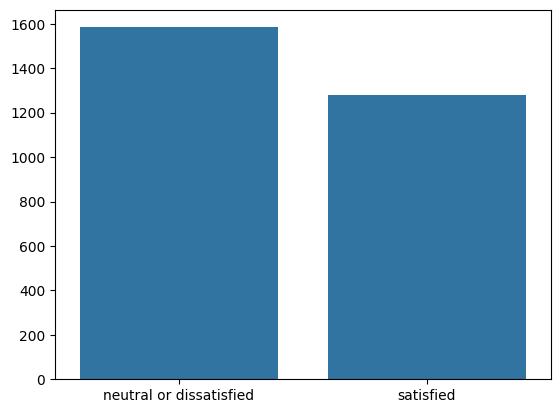

In [81]:
import seaborn as sns
maksimalni_cas_zamude = df.groupby("Satisfaction")["Arrival Delay in Minutes"].max()
satisfaction_skupine = ["neutral or dissatisfied", "satisfied"]
maksimalne_zamude = [maksimalni_cas_zamude[0], maksimalni_cas_zamude[1]]

sns.barplot(x=satisfaction_skupine, y=maksimalne_zamude)

<Axes: xlabel='Flight Distance', ylabel='Food and drink'>

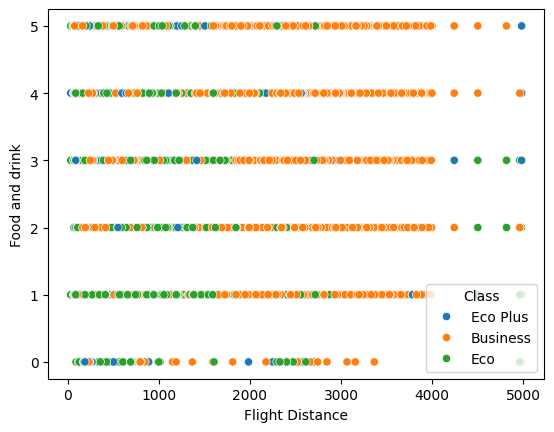

In [85]:
sns.scatterplot(x="Flight Distance", y="Food and drink", hue="Class", data=df)

### Naloga 3 *(5 T)*

- Izpišite koliko je manjkajočih podatkov v posameznih stolpcih.
- Nato manjkajoče podatke iz stolpcev zapolnite s sledečo strategijo:
    - `Flight Distance` in `Arrival Delay in Minutes` zapolnite s povprečno vrednostjo stolpca.
    - `Type of Travel` in `Class` zapolnite z najpogosteje pojavljeno vrednostjo stolpca
    - Za ostale manjkajoče vrednosti poskrbite tako, vrstice z manjkajočimi podatki odstranite.
  

- Ponovno izpišite število manjkajočih podatkov, vendar samo za stoplce, ki smo jih dopolnjevali.

In [49]:
df.isnull().sum()

Gender                                  0
Customer Type                           0
Age                                     0
Type of Travel                         72
Class                                  95
Flight Distance                       178
Departure Delay in Minutes              0
Arrival Delay in Minutes              960
Satisfaction                            0
Final_rating                         2232
Inflight wifi service                   0
Departure/Arrival time convenient       0
Ease of Online booking                  0
Gate location                           0
Food and drink                          0
Online boarding                         0
Seat comfort                            0
Inflight entertainment                  0
On-board service                        0
Leg room service                        0
Baggage handling                        0
Checkin service                         0
Inflight service                        0
Cleanliness                       

In [50]:
df["Flight Distance"].fillna(df["Flight Distance"].mean(), inplace=True)
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].mean(), inplace=True)
df["Type of Travel"].fillna(df["Type of Travel"].mode()[0], inplace=True)
df["Class"].fillna(df["Class"].mode()[0], inplace=True)
df = df.dropna()

In [51]:
df[["Flight Distance", "Arrival Delay in Minutes", "Type of Travel", "Class"]].isnull().sum()

Flight Distance             0
Arrival Delay in Minutes    0
Type of Travel              0
Class                       0
dtype: int64

### Naloga 4 *(10 T)*

- Ustvarite dve kopiji datafram-a `dfRegresija` in `dfKlasifikacija`:
  - `dfKlasifikacija` je dataframe, ki ga boste uporabili za klasifikacijo, in sicer boste napovedovali ali je bil potnik zadovoljen z letom (`Satisfaction`).
  - `dfRegresija` je dataframe, ki ga boste uporabili za regresijo, in sicer boste napovedovali končna ocena zadovoljstva potnika z letom (`Final_rating`).
- Podatke v obeh dataframih **ustrezno predprocesirajte(!)** - kategorične vrednosti pretvorite v številske (lahko uporabite LabelEncoder), številske pa standardizirajte.
- Izpišite prve 3 vrstice iz vsakega dataframa.

In [52]:
dfKlasifikacija = df.copy(deep=True)
dfRegresija = df.copy(deep=True)

In [53]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

kat_klasifikacija = df.select_dtypes(include=["object"]).columns.drop(["Satisfaction"])
kat_regresija = df.select_dtypes(include=["object"]).columns
st_klasifikacija = df.select_dtypes(include=["number"]).columns
st_regresija = df.select_dtypes(include=["number"]).columns.drop(["Final_rating"])

for k in kat_klasifikacija:
    dfKlasifikacija[k] = LabelEncoder().fit_transform(dfKlasifikacija[k])
    
for k in kat_regresija:
    dfRegresija[k] = LabelEncoder().fit_transform(dfRegresija[k])
    
dfKlasifikacija[st_klasifikacija] = StandardScaler().fit_transform(dfKlasifikacija[st_klasifikacija])
dfRegresija[st_regresija] = StandardScaler().fit_transform(dfRegresija[st_regresija])

dfKlasifikacija.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction,Final_rating,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
70172,1,0,-1.742019,1,2,-0.730444,0.264740,0.080569,neutral or dissatisfied,0.294585,...,1.354398,-0.181100,1.186427,1.234846,0.481651,-0.264784,0.313748,0.551792,1.158392,1.308001
5047,1,1,-0.948894,0,0,-0.956511,-0.361661,-0.234116,neutral or dissatisfied,-0.370400,...,-1.653611,-0.181100,-1.844711,-1.764724,-1.845583,1.255410,-0.533042,-1.817771,0.307735,-1.738964
110028,0,0,-0.882800,0,0,-0.045209,-0.387761,-0.391459,satisfied,0.527330,...,1.354398,1.301589,1.186427,1.234846,0.481651,-0.264784,0.313748,0.551792,0.307735,1.308001


In [54]:
dfKlasifikacija.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction,Final_rating,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
70172,1,0,-1.742019,1,2,-0.730444,0.264740,0.080569,neutral or dissatisfied,0.294585,...,1.354398,-0.181100,1.186427,1.234846,0.481651,-0.264784,0.313748,0.551792,1.158392,1.308001
5047,1,1,-0.948894,0,0,-0.956511,-0.361661,-0.234116,neutral or dissatisfied,-0.370400,...,-1.653611,-0.181100,-1.844711,-1.764724,-1.845583,1.255410,-0.533042,-1.817771,0.307735,-1.738964
110028,0,0,-0.882800,0,0,-0.045209,-0.387761,-0.391459,satisfied,0.527330,...,1.354398,1.301589,1.186427,1.234846,0.481651,-0.264784,0.313748,0.551792,0.307735,1.308001


### Naloga 5 *(10 T)*

S pomočjo regresija poskusite napovedati končno oceno zadovoljstva potnika z letom (`Final_rating`). Za podatke uporabite predprocesiran dataframe `dfRegresija`. Iz vhodnih podatkov izpustite tudi podatek `Satisfaction`. Podatke delite na učno in testno množico v razmerju 75:25. Naključno stanje naj bo 321. Za regresor uporabite regresijsko drevo.

- Kako dobro se je naučil model ocenite s **povprečno kvadratno napako**, zaokroženo na eno decimalko.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

x = dfRegresija.drop(["Final_rating", "Satisfaction"], axis=1)
y = dfRegresija["Final_rating"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=321)

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred = dtr.predict(x_test)

print(mean_squared_error(y_test, pred).round(1))


707.9


### Naloga 6 *(20 T)*

S pomočjo klasifikacije bomo napovedovali zadovoljstvo potnikov z letom (`Satisfaction`). Iz vhodnih podatkov odstranite še stolpec `Final_rating`. Podatke iz predprocesiranega `dfKlasifikacija` delite na učne in testne in sicer s pomočjo stratificirane delitve na 3 folde.

Nad podatkih preizkusite dva klasifikatorja - *naključni gozd* in *K najbližjih sosedov*. Ker želimo doseči najvišjo možno točnost klasifikacije to izvedite s pomočjo iskanja najboljših nastavitev parametrov po principu mreže (GridSearchCV).

Za nakjučni gozd preizkusite:
  - število dreves 50 in 100,
  - kriterij "gini" in "entropy".

Za K najbližjih sosedov pa:
  - 3, 5 in 10 sosedov.

**Najboljše izračunane vrednosti točnosti** za oba klasifkatorja prikažite v stolpičnem **grafu**.

In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

x = dfKlasifikacija.drop(["Satisfaction", "Final_rating"], axis=1)
y = dfKlasifikacija["Satisfaction"]

kfold = StratifiedKFold(n_splits=3)

parametri_rf = {
    "n_estimators": [50, 100],
    "criterion": ["gini", "entropy"]
}

parametri_knn = {
    "n_neighbors":[3, 5, 10]
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=parametri_knn, cv=kfold, scoring="accuracy")
grid_knn.fit(x, y)

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=parametri_rf, cv=kfold, scoring="accuracy")
grid_rf.fit(x, y)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

KNN: 0.9254170358988255
RF: 0.9614544968373998


<Axes: >

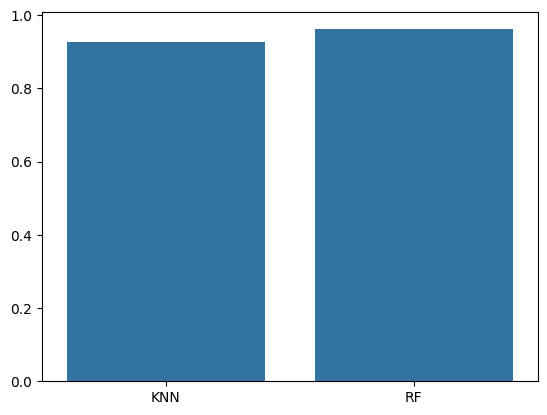

In [57]:
print(f"KNN: {grid_knn.best_score_}")
print(f"RF: {grid_rf.best_score_}")
imena = ["KNN", "RF"]
rez = [grid_knn.best_score_, grid_rf.best_score_]
sns.barplot(x=imena, y=rez)

### Naloga 7 *(10 T)*

Za konec naredite še gručenje nad enakim datasetom, kot ste ga uporabili za regresijo. Podatke transformirajte s pomočjo PCA dekompozicije. Kot algoritem gručenja uporabite KMeans.

- Da boste vedeli koliko je najbolj optimalno število gruč na katere je smiselno deliti podatke pred gručenjem izrišite **graf z izračunanimi ineciami** za od 1 do 7 gruč, nad transformiranimi poatki. Po pravilu komolca iz grafa preberite najbolj optimalno število gruč in ga uporabite v algoritmu.

- Izrišite **graf**, v katerem prikažete **transformirane podatke**, ki so obarvani glede na **gručo**, v katero so razvrščeni.

{1: 92401142.64769459, 2: 20852341.657724008, 3: 9552996.916020362, 4: 5554441.617010874, 5: 3626627.5675881426, 6: 2846305.37909482, 7: 2046000.025990487}


<Axes: >

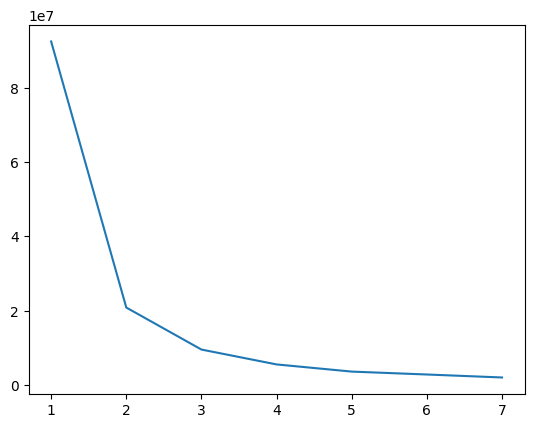

In [66]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

v_in = {}
pca = PCA(n_components=2)
df_pca = pca.fit_transform(dfRegresija)

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(df_pca)
    v_in[i] = kmeans.inertia_
print(v_in)

km2 = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df_pca)

sns.lineplot(x=v_in.keys(), y=v_in.values()) #  Najbolj optimalno stevilo gruc je 2, saj je tam prvi vecji prelom


<Axes: >

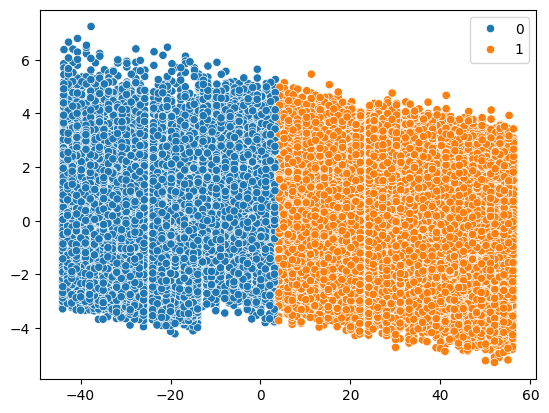

In [69]:
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=km2.labels_)